In [258]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
from matplotlib.pyplot import cm
import matplotlib.image as mpimg
from astropy.visualization import time_support
from sunpy import timeseries as ts
from sunpy.net import Fido
from sunpy.net import attrs as a

'''
import csv
 
# opening the CSV file
with open('Langmuir waves analysis/25-04-2002/WI_H1_WAV_23030.csv', mode ='r')as file:
   
  # reading the CSV file
  csvFile = csv.reader(file)
 
  # displaying the contents of the CSV file
  for lines in csvFile:
        print(lines)
'''

'''
File Specifications:
25/4/2002 5:56:34 file no. 23030 channels_1 = 7 channels_2 = 15 channels_3 = 15, goes_num = 10
17/11/2006 22:32:30 file no. 22677 channels_1 = 7 channels_2 = 15 channels_3 = 15, goes_num = 11
18/04/2014 12:55:50 file no. 233050 channels_1 = 7 channels_2 = 15 channels_3 = 14, goes_num = 15
26/04/2003 3:5:54 file no. 48697 channels_1 = 7 channels_2 = 15 channels_3 = 14, goes_num = 10
30/05/2002 5:21:14 file no. 174096 channels_1 = 7 channels_2 = 15 channels_3 = 15, goes_num = 10
11/04/2002 16:24:22 file no. 177636 channels_1 = 7 channels_2 = 15 channels_3 = 9, goes_num = 10
'''

#---------------------------------------------
# Insert what you need

# GOES specifics
tstart = "2014-04-18 12:00"
tend = "2014-04-18 16:00"
goes_num = 15 # choose GOES instrument

event_start_time = dt.datetime(2014,4,18,12,55,50) # start time of the event yyyy,mm,dd,HH,MM,SS

# Define path
file_no = str(233050)
date_for_path = '18-04-2014'

# Choose appropriate channels
channels_1 = 7 # bottom channels
channels_2 = 15 # top channels
channels_3 = 14 # middle channels
#---------------------------------------------

f2_header = 46 # 6 eV to 1113 eV 
f3_header = 51 # 200 eV to 27 keV 
f1_header = 72 # 27 keV up 
spec_header = 43

path = 'Langmuir waves analysis/' + date_for_path + '/'
spec_name = 'WI_H1_WAV_' + file_no + '.csv'
f2_name = 'WI_ELSP_3DP_' + file_no + '.csv' # ELSP
f3_name = 'WI_EHSP_3DP_' + file_no + '.csv' # EHSP
f1_name = 'WI_SFSP_3DP_' + file_no + '.csv' # SFSP

#rhessi_date = '_20140418'
#rhessi_timeinterval = '_120000_160000'
#rhessi_filepath = 'Langmuir waves analysis/' + date_for_path + '/' + 'goes_rhessi' + rhessi_date + rhessi_timeinterval + '.eps'

init_channels_1 = 0
init_channels_2 = 0
init_channels_3 = 0

def arrival_time(E):
    m = 9.1e-31
    v = np.sqrt(3.2e-16 * E/m)
    dist = 215*7e8
    t = dist/v
    return event_start_time + dt.timedelta(0,t) 


In [259]:
result = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"))
print(result)

Results from 1 Provider:

2 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        Instrument ... Source Provider
----------------------- ----------------------- ---------- ... ------ --------
2014-04-18 00:00:00.000 2014-04-18 23:59:59.999        XRS ...   GOES     NOAA
2014-04-18 00:00:00.000 2014-04-18 23:59:59.999        XRS ...   GOES     NOAA




In [260]:
result_goes = Fido.search(a.Time(tstart, tend), a.Instrument("XRS"), a.goes.SatelliteNumber(goes_num))
print(result_goes)

Results from 1 Provider:

1 Results from the XRSClient:
Source: <8: https://umbra.nascom.nasa.gov/goes/fits 
8-15: https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/ 
16-17: https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/

       Start Time               End Time        Instrument ... Source Provider
----------------------- ----------------------- ---------- ... ------ --------
2014-04-18 00:00:00.000 2014-04-18 23:59:59.999        XRS ...   GOES     NOAA




In [261]:
file_goes = Fido.fetch(result_goes)

Files Downloaded: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.37file/s]


C:\Users\franc\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
C:\Users\franc\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


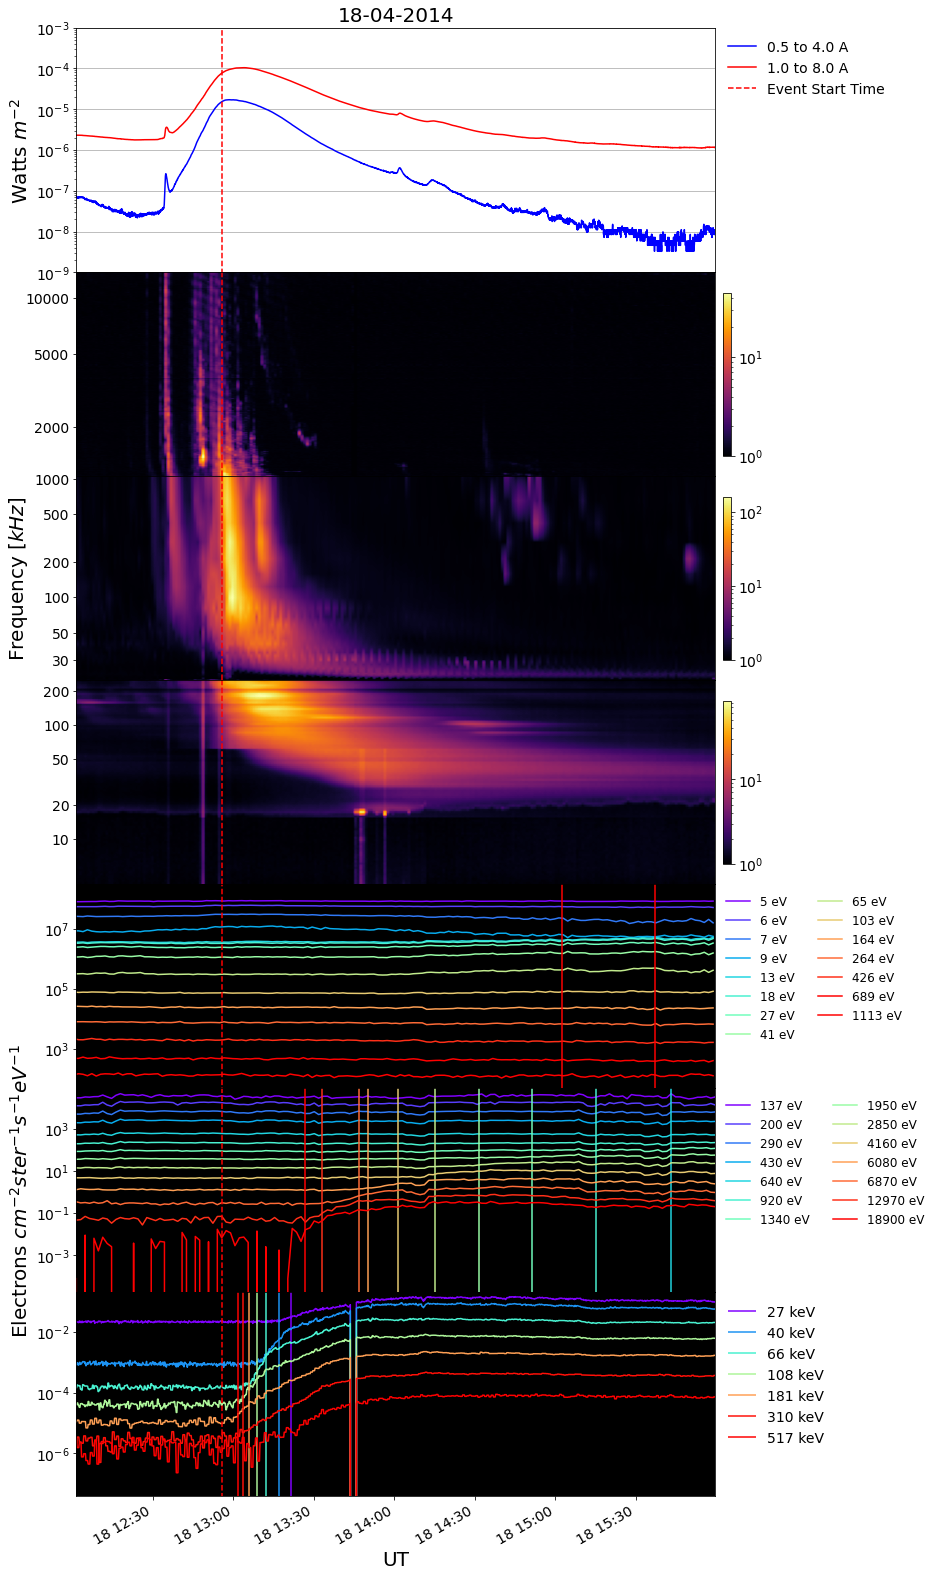

In [262]:

df_spec = pd.read_csv(path + spec_name, header=spec_header, skipfooter=3)
df_spec['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df_spec['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

dates_list = df_spec['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'].to_list()
x_lims_ = [dates_list[0], dates_list[-1]]
#x_lims = list(map(dt.datetime.fromtimestamp, x_lims_))
x_lims = mdates.date2num(x_lims_)

y_lims0 = np.linspace(1075, 13825, 100)
y_lims1 = np.linspace(20, 1040, 100)
y_lims2 = np.linspace(4, 245, 100)

ratios0=[1,0]
ratios1=[1,0.19099]
ratios_rhessi = [1,0.191]
col_posit = 0.01
shrink_c = 0.8

@plt.FuncFormatter
def fake_log(x, pos):
    'The two args are the value and tick position'
    return round(10**x) #r'$10^{%.2f}$' % (x)

df_spec = df_spec.set_index('EPOCH_yyyy-mm-ddThh:mm:ss.sssZ')
df_spec = df_spec[df_spec.columns[::-1]].T

df_spec0 = df_spec.iloc[353:-1, :]
df_spec1 = df_spec.iloc[95:353, :]
df_spec2 = df_spec.iloc[0:95, :]

date_format = mdates.DateFormatter('%H:%M:%S')
locator = mdates.HourLocator([4, 5, 6, 7, 8, 9])

plt.rc('ytick', labelsize=14)
plt.rc('xtick', labelsize=14)


fig = plt.figure(figsize=(15,30))
ax = fig.add_gridspec(3, 1, hspace=0, height_ratios=[0.4,1,1])


ax_rhessi = ax[0].subgridspec(1, 2, hspace=0, width_ratios=ratios_rhessi)
ax_0 = ax[1].subgridspec(3, 2, hspace=0, width_ratios=ratios0)
ax_1 = ax[2].subgridspec(3, 2, hspace=0, width_ratios=ratios1)

axrhessi = fig.add_subplot(ax_rhessi[0, 0])
axrhessi_fake = fig.add_subplot(ax_rhessi[0, 1])

ax0 = [fig.add_subplot(ax_0[0, 0]), fig.add_subplot(ax_0[1, 0]), fig.add_subplot(ax_0[2, 0])]
ax0_fake = [fig.add_subplot(ax_0[0, 1]), fig.add_subplot(ax_0[1, 1]), fig.add_subplot(ax_0[2, 1])]


ax1 = [fig.add_subplot(ax_1[0, 0]), fig.add_subplot(ax_1[1, 0]), fig.add_subplot(ax_1[2, 0])]
ax1_fake = [fig.add_subplot(ax_1[0, 1]), fig.add_subplot(ax_1[1, 1]), fig.add_subplot(ax_1[2, 1])]


flare_time = mdates.date2num(event_start_time)


goes_ = ts.TimeSeries(file_goes[0])

goes_a = goes_.data['xrsa'].tolist()
goes_b = goes_.data['xrsb'].tolist()
goes_time = mdates.date2num(goes_.data.index)

axrhessi.plot(goes_time, goes_a, 'b', label='0.5 to 4.0 A')
axrhessi.plot(goes_time, goes_b, 'r', label='1.0 to 8.0 A')

n = len(file_goes)
if n >= 1:
    iterat = 1
    while iterat < n:
        goes_ = ts.TimeSeries(file_goes[iterat])
        goes_a = goes_.data['xrsa'].tolist()
        goes_b = goes_.data['xrsb'].tolist()
        goes_time = mdates.date2num(goes_.data.index)
        axrhessi.plot(goes_time, goes_a, 'b')
        axrhessi.plot(goes_time, goes_b, 'r')
        iterat += 1

        
#goes_.peek()


for a in ax1:
    a.set_anchor('W')

for a in ax1:
    a.patch.set_facecolor('black')

for a in ax0:
    a.patch.set_facecolor('black')

df_spec0 = df_spec0.clip(lower=1)
im = ax0[0].imshow(df_spec0, norm=colors.LogNorm(), cmap=cm.inferno,
                  extent = [x_lims[0], x_lims[1],  np.log10(y_lims0[0]), np.log10(y_lims0[-1])], aspect='auto')
fig.colorbar(im, ax=ax0[0], pad=col_posit, shrink=shrink_c)

ax0[0].xaxis.set(major_formatter=date_format)
ax0[0].tick_params(bottom = False)
ax0[0].set_xticks([])
ax0[0].yaxis.set_major_formatter(fake_log)
ax0[0].yaxis.set_major_locator(MaxNLocator(5)) 
ax0[0].set_yticks(np.log10(np.array([2000, 5000, 10000])))


#df_spec1*=10 # multiplies every element by 10
df_spec1 = df_spec1.clip(lower=1)
im = ax0[1].imshow(df_spec1, norm=colors.LogNorm(), cmap=cm.inferno,
                  extent = [x_lims[0], x_lims[1],  np.log10(y_lims1[0]), np.log10(y_lims1[-1])], aspect='auto')
fig.colorbar(im, ax=ax0[1], pad=col_posit, shrink=shrink_c)

ax0[1].xaxis.set(major_formatter=date_format)
ax0[1].tick_params(bottom = False)
ax0[1].set_xticks([])
ax0[1].yaxis.set_major_formatter(fake_log)
ax0[1].yaxis.set_major_locator(MaxNLocator(5)) 
ax0[1].set_yticks(np.log10(np.array([30, 50, 100, 200, 500, 1000])))

df_spec2 = df_spec2.clip(lower=1)
im = ax0[2].imshow(df_spec2, norm=colors.LogNorm(), cmap=cm.inferno, 
                  extent = [x_lims[0], x_lims[1],  np.log10(y_lims2[0]), np.log10(y_lims2[-1])], aspect='auto')
fig.colorbar(im, ax=ax0[2], pad=col_posit, shrink=shrink_c)

ax0[2].xaxis.set(major_formatter=date_format)
ax0[2].tick_params(bottom = False)
ax0[2].set_xticks([])
ax0[2].yaxis.set_major_formatter(fake_log)
ax0[2].yaxis.set_major_locator(MaxNLocator(5)) 
ax0[2].set_yticks(np.log10(np.array([10, 20, 50, 100, 200])))

#second set of images

df1 = pd.read_csv(path + f1_name, header=f1_header, skipfooter=3)
df1['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df1['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

df2 = pd.read_csv(path + f2_name, header=f2_header, skipfooter=3)
df2['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

df3 = pd.read_csv(path + f3_name, header=f3_header, skipfooter=3)
df3['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df3['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'], format = '%Y-%m-%dT%H:%M:%S.%fZ')


i1, i2, i3 = init_channels_1 , init_channels_2, init_channels_3
energies1 = [27, 40, 66, 108, 181, 310, 517]
energies2 = list(np.array([5, 6, 7, 9, 13, 18, 27, 41, 65, 103, 164, 264, 426, 689, 1113])*1e-3)
energies3 = [0.137, 0.2, 0.29, 0.43, 0.64, 0.92, 1.34, 1.95, 2.85, 4.16, 6.08, 6.87, 12.97, 18.9, 27]


while i1<= channels_1 - 1 :
    ax1[2].plot(df1.iloc[:, 0], df1.iloc[:, i1+1], c=cm.rainbow([50*i1]))
    ax1[2].vlines(arrival_time(energies1[i1]), 0,0.3, color=cm.rainbow([50*i1]), label = str(energies1[i1]) + ' keV')
    ax1[2].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
    ax1[2].set_yscale("log")
    plt.gcf().autofmt_xdate()
    i1 += 1

while i2 < channels_2 :
    init_indx2 = 1 + init_channels_2
    df2_channels = df2.iloc[:, init_indx2:16]
    df2_reversed = df2_channels[df2_channels.columns[::-1]]
    ax1[0].plot(df2.iloc[:, 0], df2_reversed.iloc[:, i2], c=cm.rainbow([20*i2]), label = str(round(energies2[i2]*1e3)) + ' eV')
    ax1[0].vlines(arrival_time(energies2[i2]), 0,4e8, color=cm.rainbow([20*i2]))
    ax1[0].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
    ax1[0].set_yscale("log")
    i2 += 1

while i3 < channels_3 :
    init_indx3 = 1 + init_channels_3
    df3_channels = df3.iloc[:, init_indx3:16]
    df3_reversed = df3_channels[df3_channels.columns[::-1]]
    ax1[1].plot(df3.iloc[:, 0], df3_reversed.iloc[:, i3], c=cm.rainbow([20*i3]), label = str(round(energies3[i3]*1e3)) + ' eV')
    ax1[1].vlines(arrival_time(energies3[i3]), 0,1e5, color=cm.rainbow([20*i3]))
    ax1[1].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
    ax1[1].set_yscale("log")
    i3 += 1


ax0[0].vlines(flare_time, np.log10(y_lims0[0]), np.log10(y_lims0[-1]), 'r', linestyle='--')
ax0[1].vlines(flare_time, np.log10(y_lims1[0]), np.log10(y_lims1[-1]), 'r', linestyle='--')
ax0[2].vlines(flare_time, np.log10(y_lims2[0]), np.log10(y_lims2[-1]), 'r', linestyle='--')

ax1[0].vlines(flare_time, -1, 1e9, 'r', linestyle='--')
ax1[1].vlines(flare_time, -1, 1e9, 'r', linestyle='--')
ax1[2].vlines(flare_time, -1, 1e9, 'r', linestyle='--')

ax1[1].set_ylim(None, 8e4)
ax1[0].set_ylim(top=3e8)
ax1[2].set_ylim(top=0.2)

ax0[0].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
ax0[1].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
ax0[2].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])

ax1[0].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
ax1[1].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
ax1[2].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])

ax1[0].set_xticks([])
ax1[1].set_xticks([])
ax1[0].legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize = 12, frameon=False, ncol=2)
ax1[1].legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize = 12, frameon=False, ncol=2)
ax1[2].legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize = 14, frameon=False)
ax1[2].set_xlabel('UT', fontsize = 20)
ax0[1].set_ylabel('Frequency $[kHz]$', fontsize = 20)
ax1[1].set_ylabel('Electrons $cm^{-2} ster^{-1} s^{-1} eV^{-1}$', fontsize = 20)

axrhessi.set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
axrhessi.vlines(flare_time, -1, 1, 'r', linestyle='--', label = 'Event Start Time')
axrhessi.set_ylim(1e-9, 0.001)
axrhessi.set_yscale("log")
axrhessi.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 14, frameon=False)
axrhessi.grid(axis='y')
axrhessi.set_ylabel('Watts $m^{-2}$', fontsize = 20)
axrhessi.set_title(date_for_path, fontsize = 20)

for a in ax1_fake:
    a.set_visible(False)

for a in ax0_fake:
    a.set_visible(False)

axrhessi_fake.set_visible(False)
#axrhessi.set_visible(False)
#plt.show()
plt.savefig(path + "Spec_Plot_" + date_for_path, bbox_inches='tight')

In [3]:
'''
df_spec = pd.read_csv('Langmuir waves analysis/25-04-2002/WI_H1_WAV_23030.csv', header=43, skipfooter=3)
df_spec['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df_spec['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

dates_list = df_spec['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'].to_list()
x_lims_ = [dates_list[0].timestamp(), dates_list[-1].timestamp()]
x_lims = list(map(dt.datetime.fromtimestamp, x_lims_))
x_lims = mdates.date2num(x_lims)

y_lims0 = np.linspace(1075, 13825, 100)
y_lims1 = np.linspace(20, 1040, 100)
y_lims2 = np.linspace(4, 245, 100)

@plt.FuncFormatter
def fake_log(x, pos):
    'The two args are the value and tick position'
    return r'$10^{%f}$' % (x)

df_spec = df_spec.set_index('EPOCH_yyyy-mm-ddThh:mm:ss.sssZ')
df_spec = df_spec[df_spec.columns[::-1]].T

df_spec0 = df_spec.iloc[353:-1, :]
df_spec1 = df_spec.iloc[95:353, :]
df_spec2 = df_spec.iloc[0:95, :]

date_format = mdates.DateFormatter('%H:%M:%S')
locator = mdates.HourLocator([4, 5, 6, 7, 8, 9])

fig, ax = plt.subplots(3, 1, figsize=(10,7))

im = ax[0].imshow(df_spec0, norm=colors.LogNorm(), cmap=cm.inferno, extent = [x_lims[0], x_lims[1],  np.log10(y_lims0[0]), np.log10(y_lims0[-1])], aspect='auto')


ax[0].figure.colorbar(im, ax=ax[0])
ax[0].xaxis.set(major_formatter=date_format, major_locator=locator)
ax[0].tick_params(bottom = False)
ax[0].set_xticks([])
ax[0].yaxis.set_major_formatter(fake_log)
ax[0].yaxis.set_major_locator(MaxNLocator(5)) 
ax[0].set_yticks(np.log10(np.array([2000, 5000, 10000])))


im = ax[1].imshow(df_spec1, norm=colors.LogNorm(), cmap=cm.inferno, extent = [x_lims[0], x_lims[1],  np.log10(y_lims1[0]), np.log10(y_lims1[-1])], aspect='auto')


ax[1].figure.colorbar(im, ax=ax[1])
ax[1].xaxis.set(major_formatter=date_format, major_locator=locator)
ax[1].tick_params(bottom = False)
ax[1].set_xticks([])
ax[1].yaxis.set_major_formatter(fake_log)
ax[1].yaxis.set_major_locator(MaxNLocator(5)) 
ax[1].set_yticks(np.log10(np.array([20, 50, 100, 200, 500, 1000])))


im = ax[2].imshow(df_spec2, norm=colors.LogNorm(), cmap=cm.inferno, extent = [x_lims[0], x_lims[1],  np.log10(y_lims2[0]), np.log10(y_lims2[-1])], aspect='auto')


ax[2].figure.colorbar(im, ax=ax[2])
ax[2].xaxis.set(major_formatter=date_format, major_locator=locator)
ax[2].tick_params(bottom = False)
#ax[2].set_xticks([])
ax[2].yaxis.set_major_formatter(fake_log)
ax[2].yaxis.set_major_locator(MaxNLocator(5)) 
ax[2].set_yticks(np.log10(np.logspace(np.log10(5),np.log10(200),5)))

fig.autofmt_xdate()

plt.show()'''

"\ndf_spec = pd.read_csv('Langmuir waves analysis/25-04-2002/WI_H1_WAV_23030.csv', header=43, skipfooter=3)\ndf_spec['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df_spec['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'], format = '%Y-%m-%dT%H:%M:%S.%fZ')\n\ndates_list = df_spec['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'].to_list()\nx_lims_ = [dates_list[0].timestamp(), dates_list[-1].timestamp()]\nx_lims = list(map(dt.datetime.fromtimestamp, x_lims_))\nx_lims = mdates.date2num(x_lims)\n\ny_lims0 = np.linspace(1075, 13825, 100)\ny_lims1 = np.linspace(20, 1040, 100)\ny_lims2 = np.linspace(4, 245, 100)\n\n@plt.FuncFormatter\ndef fake_log(x, pos):\n    'The two args are the value and tick position'\n    return r'$10^{%f}$' % (x)\n\ndf_spec = df_spec.set_index('EPOCH_yyyy-mm-ddThh:mm:ss.sssZ')\ndf_spec = df_spec[df_spec.columns[::-1]].T\n\ndf_spec0 = df_spec.iloc[353:-1, :]\ndf_spec1 = df_spec.iloc[95:353, :]\ndf_spec2 = df_spec.iloc[0:95, :]\n\ndate_format = mdates.DateFormatter('%H:%M:%S')\nlocator = mdates.

In [4]:
'''
df_spec = pd.read_csv(path + spec_name, header=spec_header, skipfooter=3)
df_spec['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df_spec['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

dates_list = df_spec['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'].to_list()
x_lims_ = [dates_list[0].timestamp(), dates_list[-1].timestamp()]
x_lims = list(map(dt.datetime.fromtimestamp, x_lims_))
x_lims = mdates.date2num(x_lims)

y_lims0 = np.linspace(1075, 13825, 100)
y_lims1 = np.linspace(20, 1040, 100)
y_lims2 = np.linspace(4, 245, 100)

@plt.FuncFormatter
def fake_log(x, pos):
    'The two args are the value and tick position'
    return round(10**x) #r'$10^{%.2f}$' % (x)

df_spec = df_spec.set_index('EPOCH_yyyy-mm-ddThh:mm:ss.sssZ')
df_spec = df_spec[df_spec.columns[::-1]].T

df_spec0 = df_spec.iloc[353:-1, :]
df_spec1 = df_spec.iloc[95:353, :]
df_spec2 = df_spec.iloc[0:95, :]

date_format = mdates.DateFormatter('%H:%M:%S')
locator = mdates.HourLocator([4, 5, 6, 7, 8, 9])

fig, ax = plt.subplots(6, 1, figsize=(15,20), layout='compressed')
#fig.subplots_adjust(left=0, right=0, hspace=0)

col_posit = -0.1
flare_time = dt.datetime.fromtimestamp(event_start_time.timestamp() + 3600)
flare_time = mdates.date2num(flare_time)


for a in ax:
    a.set_anchor('W')

for a in ax:
    a.patch.set_facecolor('black')

im = ax[0].imshow(df_spec0, norm=colors.LogNorm(), cmap=cm.inferno,
                  extent = [x_lims[0], x_lims[1],  np.log10(y_lims0[0]), np.log10(y_lims0[-1])], aspect='auto')
fig.colorbar(im, ax=ax[0], pad=col_posit)

ax[0].xaxis.set(major_formatter=date_format)
ax[0].tick_params(bottom = False)
ax[0].set_xticks([])
ax[0].yaxis.set_major_formatter(fake_log)
ax[0].yaxis.set_major_locator(MaxNLocator(5)) 
ax[0].set_yticks(np.log10(np.array([2000, 5000, 10000])))


im = ax[1].imshow(df_spec1, norm=colors.LogNorm(), cmap=cm.inferno,
                  extent = [x_lims[0], x_lims[1],  np.log10(y_lims1[0]), np.log10(y_lims1[-1])], aspect='auto')
fig.colorbar(im, ax=ax[1], pad=col_posit)

ax[1].xaxis.set(major_formatter=date_format)
ax[1].tick_params(bottom = False)
ax[1].set_xticks([])
ax[1].yaxis.set_major_formatter(fake_log)
ax[1].yaxis.set_major_locator(MaxNLocator(5)) 
ax[1].set_yticks(np.log10(np.array([20, 50, 100, 200, 500, 1000])))


im = ax[2].imshow(df_spec2, norm=colors.LogNorm(), cmap=cm.inferno, 
                  extent = [x_lims[0], x_lims[1],  np.log10(y_lims2[0]), np.log10(y_lims2[-1])], aspect='auto')
fig.colorbar(im, ax=ax[2], pad=col_posit)

ax[2].xaxis.set(major_formatter=date_format)
ax[2].tick_params(bottom = False)
ax[2].set_xticks([])
ax[2].yaxis.set_major_formatter(fake_log)
ax[2].yaxis.set_major_locator(MaxNLocator(5)) 
ax[2].set_yticks(np.log10(np.array([10, 20, 50, 100, 200])))

#second set of images

df1 = pd.read_csv(path + f1_name, header=f1_header, skipfooter=3)
df1['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df1['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

df2 = pd.read_csv(path + f2_name, header=f2_header, skipfooter=3)
df2['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df2['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

df3 = pd.read_csv(path + f3_name, header=f3_header, skipfooter=3)
df3['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df3['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'], format = '%Y-%m-%dT%H:%M:%S.%fZ')


i1, i2, i3 = 1, 1, 1
energies1 = [27, 40, 66, 108, 181, 310, 517]
energies2 = list(reversed(list(np.array([6, 7, 9, 13, 18, 27, 41, 65, 103, 164, 264, 426, 689, 1113])*1e-3)))
energies3 = list(reversed([0.137, 0.2, 0.29, 0.43, 0.64, 0.92, 1.34, 1.95, 2.85, 4.16, 6.08, 6.87, 12.97, 18.9, 27]))


while i1 < 8 :
    ax[5].plot(df1.iloc[:, 0], df1.iloc[:, i1], c=cm.rainbow([50*i1]))
    ax[5].vlines(arrival_time(energies1[i1-1]), 0,0.3, color=cm.rainbow([50*i1]), label = str(energies1[i1-1]) + ' keV')
    ax[5].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
    ax[5].set_yscale("log")
    plt.gcf().autofmt_xdate()
    i1 += 1

while i2 < 15 :
    ax[3].plot(df2.iloc[:, 0], df2.iloc[:, i2], c=cm.rainbow([20*i2]), label = str(round(energies2[i2-1]*1e3)) + ' eV')
    ax[3].vlines(arrival_time(energies2[i2-1]), 0,4e8, color=cm.rainbow([20*i2]))
    ax[3].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
    ax[3].set_yscale("log")
    i2 += 1

while i3 < 15 :
    ax[4].plot(df3.iloc[:, 0], df3.iloc[:, i3], c=cm.rainbow([20*i3]), label = str(round(energies3[i3-1]*1e3)) + ' eV')
    ax[4].vlines(arrival_time(energies3[i3-1]), 0,1e5, color=cm.rainbow([20*i3]))
    ax[4].set_xlim(df3.iloc[0, 0], df3.iloc[-1, 0])
    ax[4].set_yscale("log")
    i3 += 1


ax[0].vlines(flare_time, np.log10(y_lims0[0]), np.log10(y_lims0[-1]), 'r')
ax[1].vlines(flare_time, np.log10(y_lims1[0]), np.log10(y_lims1[-1]), 'r')
ax[2].vlines(flare_time, np.log10(y_lims2[0]), np.log10(y_lims2[-1]), 'r')
ax[4].set_ylim(None, 8e4)
ax[3].set_ylim(top=3e8)
ax[5].set_ylim(top=0.2)
ax[3].set_xticks([])
ax[4].set_xticks([])
ax[3].legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize = 11, frameon=False)
ax[4].legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize = 11, frameon=False)
ax[5].legend(loc='upper left', bbox_to_anchor=(1, 1),fontsize = 11, frameon=False)
ax[5].set_xlabel('UT', fontsize = 20)
ax[1].set_ylabel('Frequency [kHz]', fontsize = 20)
ax[4].set_ylabel('Eletrons $cm^{-2} ster^{-1} s^{-1} eV^{-1}$', fontsize = 20)
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16)

#plt.show()
plt.savefig(path + "Spec_Plot_" + date_for_path, bbox_inches='tight')'''

'\ndf_spec = pd.read_csv(path + spec_name, header=spec_header, skipfooter=3)\ndf_spec[\'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ\'] = pd.to_datetime(df_spec[\'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ\'], format = \'%Y-%m-%dT%H:%M:%S.%fZ\')\n\ndates_list = df_spec[\'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ\'].to_list()\nx_lims_ = [dates_list[0].timestamp(), dates_list[-1].timestamp()]\nx_lims = list(map(dt.datetime.fromtimestamp, x_lims_))\nx_lims = mdates.date2num(x_lims)\n\ny_lims0 = np.linspace(1075, 13825, 100)\ny_lims1 = np.linspace(20, 1040, 100)\ny_lims2 = np.linspace(4, 245, 100)\n\n@plt.FuncFormatter\ndef fake_log(x, pos):\n    \'The two args are the value and tick position\'\n    return round(10**x) #r\'$10^{%.2f}$\' % (x)\n\ndf_spec = df_spec.set_index(\'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ\')\ndf_spec = df_spec[df_spec.columns[::-1]].T\n\ndf_spec0 = df_spec.iloc[353:-1, :]\ndf_spec1 = df_spec.iloc[95:353, :]\ndf_spec2 = df_spec.iloc[0:95, :]\n\ndate_format = mdates.DateFormatter(\'%H:%M:%S\')\nlocator = mdates